![](pics/header-2.png)

# Undistortion

Kevin Walcko

---

`StereoCamera` has a method that will give you a `UndistortStereo` object which allows you to undistort stereo images easily.

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from opencv_camera import StereoCamera
from opencv_camera import visualizeDistortion
from opencv_camera import UndistortStereo, UnDistort

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
img = cv2.imread("aruco-imgs-2/0.png",0)
h,w = img.shape[:2]
imgl = img[:,:w//2]
imgr = img[:,w//2:]

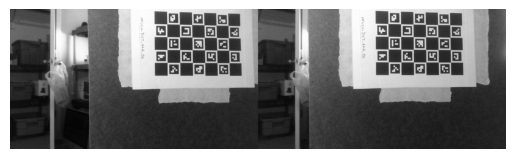

In [5]:
plt.imshow(np.hstack((imgl, imgr)), cmap="gray")
plt.axis("off");

In [25]:
sc = StereoCamera.from_yaml("camera.yml")
print(sc)

Camera 1 --------------------------
  focalLength(x,y): 1061.4 1060.8 px 
  principlePoint(x,y): 626.2 368.0 px
  distortionCoeffs: [[ 0.123 -0.545  0.     0.001  0.657]]
Camera 2 --------------------------
  focalLength(x,y): 1059.1 1058.6 px 
  principlePoint(x,y): 629.4 368.4 px
  distortionCoeffs: [[ 0.121 -0.528  0.002 -0.002  0.634]]
Extrinsic Camera Parameters -------
  Translation between Left/Right Camera: [[-0.03 -0.   -0.  ]]
  Rotation between Left/Right Camera:
    [[ 1.     0.001  0.   ]
     [-0.001  1.    -0.002]
     [-0.     0.002  1.   ]]
  Essential Matrix:
    [[-0.    0.   -0.  ]
     [-0.    0.    0.03]
     [ 0.   -0.03  0.  ]]
  Fundatmental Matrix:
    [[-0.     0.    -0.021]
     [-0.     0.     2.542]
     [ 0.025 -2.54   1.   ]]



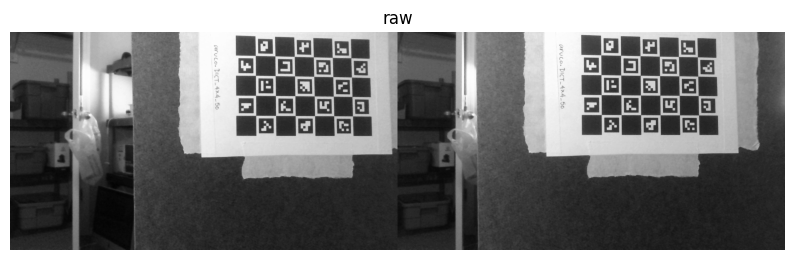

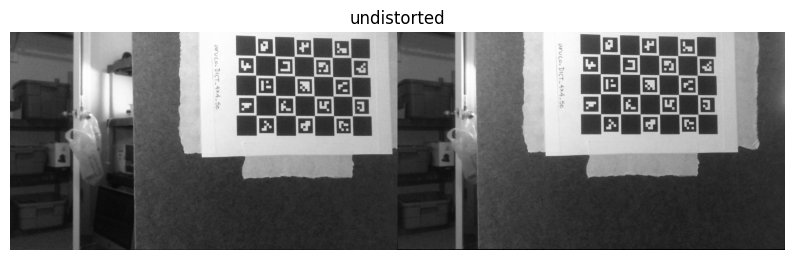

In [26]:
h,w = imgl.shape[:2]
uds = sc.getUndistortion(h,w)

a, b = uds.undistort(imgl, imgr)

plt.figure(figsize=(10,5))
plt.imshow(np.hstack((imgl, imgr)), cmap="gray");
plt.axis("off")
plt.title("raw");

plt.figure(figsize=(10,5))
plt.imshow(np.hstack((a, b)), cmap="gray");
plt.axis("off")
plt.title("undistorted");

# Appendix: Source Code

In [30]:
from jtb import getCodeUrl, getCodeFile, getCodeImport

getCodeImport(UnDistort)

In [29]:
getCodeImport(UndistortStereo)